In [1]:
!pip install tensorflow
!pip install Keras
!pip install numpy
!pip install flask

     -------------------------------------- 413.4/413.4 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling protobuf-4.21.2:
      Successfully uninstalled protobuf-4.21.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.25.3 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [10]:
train_data_path = "D:/Dataset1/train"
validation_data_path = "D:/Dataset1/val"

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_data = train_datagen.flow_from_directory(train_data_path,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='categorical')


Found 8640 images belonging to 6 classes.
Found 721 images belonging to 6 classes.


In [13]:
# Change the number of units in the last Dense layer to match the number of classes (6)
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=256, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    # Change the number of units to match the number of classes (6) and use softmax activation
    keras.layers.Dense(units=6, activation='softmax')
])
cnn_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model_path = "D:/Model_save"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = cnn_model.fit(training_data,
                        epochs=50,
                        verbose=1,
                        validation_data=valid_data,
                        callbacks=callbacks_list)

Epoch 1/50
270/270 [==============================] - ETA: 0s - loss: 0.2735 - accuracy: 0.9069
Epoch 1: val_accuracy improved from -inf to 0.88627, saving model to D:/Model_save
INFO:tensorflow:Assets written to: D:/Model_save\assets


INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 237s 874ms/step - loss: 0.2735 - accuracy: 0.9069 - val_loss: 0.3647 - val_accuracy: 0.8863
Epoch 2/50
270/270 [==============================] - ETA: 0s - loss: 0.2603 - accuracy: 0.9126
Epoch 2: val_accuracy improved from 0.88627 to 0.90014, saving model to D:/Model_save
INFO:tensorflow:Assets written to: D:/Model_save\assets


INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 215s 795ms/step - loss: 0.2603 - accuracy: 0.9126 - val_loss: 0.3638 - val_accuracy: 0.9001
Epoch 3/50
270/270 [==============================] - ETA: 0s - loss: 0.3067 - accuracy: 0.9009
Epoch 3: val_accuracy did not improve from 0.90014
270/270 [==============================] - 211s 782ms/step - loss: 0.3067 - accuracy: 0.9009 - val_loss: 0.3529 - val_accuracy: 0.8738
Epoch 4/50
270/270 [==============================] - ETA: 0s - loss: 0.2697 - accuracy: 0.9131
Epoch 4: val_accuracy did not improve from 0.90014
270/270 [==============================] - 209s 774ms/step - loss: 0.2697 - accuracy: 0.9131 - val_loss: 0.4247 - val_accuracy: 0.8932
Epoch 5/50
270/270 [==============================] - ETA: 0s - loss: 0.2055 - accuracy: 0.9301
Epoch 5: val_accuracy did not improve from 0.90014
270/270 [==============================] - 215s 795ms/step - loss: 0.2055 - accuracy: 0.9301 - val_loss: 0.4060 - val_accuracy: 0.8904
Epoch 6/50
270/270 

INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 235s 870ms/step - loss: 0.1831 - accuracy: 0.9447 - val_loss: 0.3946 - val_accuracy: 0.9112
Epoch 11/50
270/270 [==============================] - ETA: 0s - loss: 0.1418 - accuracy: 0.9541
Epoch 11: val_accuracy did not improve from 0.91123
270/270 [==============================] - 225s 833ms/step - loss: 0.1418 - accuracy: 0.9541 - val_loss: 0.5583 - val_accuracy: 0.8669
Epoch 12/50
270/270 [==============================] - ETA: 0s - loss: 0.1766 - accuracy: 0.9440
Epoch 12: val_accuracy did not improve from 0.91123
270/270 [==============================] - 225s 835ms/step - loss: 0.1766 - accuracy: 0.9440 - val_loss: 0.4288 - val_accuracy: 0.9057
Epoch 13/50
270/270 [==============================] - ETA: 0s - loss: 0.1728 - accuracy: 0.9507
Epoch 13: val_accuracy improved from 0.91123 to 0.91678, saving model to D:/Model_save
INFO:tensorflow:Assets written to: D:/Model_save\assets


INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 228s 846ms/step - loss: 0.1728 - accuracy: 0.9507 - val_loss: 0.3425 - val_accuracy: 0.9168
Epoch 14/50
270/270 [==============================] - ETA: 0s - loss: 0.1648 - accuracy: 0.9515
Epoch 14: val_accuracy improved from 0.91678 to 0.91956, saving model to D:/Model_save
INFO:tensorflow:Assets written to: D:/Model_save\assets


INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 234s 868ms/step - loss: 0.1648 - accuracy: 0.9515 - val_loss: 0.3661 - val_accuracy: 0.9196
Epoch 15/50
270/270 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9574
Epoch 15: val_accuracy did not improve from 0.91956
270/270 [==============================] - 216s 797ms/step - loss: 0.1471 - accuracy: 0.9574 - val_loss: 0.4014 - val_accuracy: 0.9057
Epoch 16/50
270/270 [==============================] - ETA: 0s - loss: 0.1690 - accuracy: 0.9509
Epoch 16: val_accuracy did not improve from 0.91956
270/270 [==============================] - 165s 609ms/step - loss: 0.1690 - accuracy: 0.9509 - val_loss: 0.4407 - val_accuracy: 0.9057
Epoch 17/50
270/270 [==============================] - ETA: 0s - loss: 0.2038 - accuracy: 0.9406
Epoch 17: val_accuracy improved from 0.91956 to 0.92094, saving model to D:/Model_save
INFO:tensorflow:Assets written to: D:/Model_save\assets


INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 159s 590ms/step - loss: 0.2038 - accuracy: 0.9406 - val_loss: 0.3227 - val_accuracy: 0.9209
Epoch 18/50
270/270 [==============================] - ETA: 0s - loss: 0.1373 - accuracy: 0.9578
Epoch 18: val_accuracy did not improve from 0.92094
270/270 [==============================] - 159s 589ms/step - loss: 0.1373 - accuracy: 0.9578 - val_loss: 0.4234 - val_accuracy: 0.8946
Epoch 19/50
270/270 [==============================] - ETA: 0s - loss: 0.1573 - accuracy: 0.9573
Epoch 19: val_accuracy did not improve from 0.92094
270/270 [==============================] - 157s 582ms/step - loss: 0.1573 - accuracy: 0.9573 - val_loss: 0.4381 - val_accuracy: 0.9043
Epoch 20/50
270/270 [==============================] - ETA: 0s - loss: 0.1346 - accuracy: 0.9624
Epoch 20: val_accuracy did not improve from 0.92094
270/270 [==============================] - 157s 583ms/step - loss: 0.1346 - accuracy: 0.9624 - val_loss: 0.5051 - val_accuracy: 0.9085
Epoch 21/50
2

INFO:tensorflow:Assets written to: D:/Model_save\assets


270/270 [==============================] - 168s 622ms/step - loss: 0.1444 - accuracy: 0.9581 - val_loss: 0.3749 - val_accuracy: 0.9223
Epoch 33/50
270/270 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9662
Epoch 33: val_accuracy did not improve from 0.92233
270/270 [==============================] - 158s 585ms/step - loss: 0.1279 - accuracy: 0.9662 - val_loss: 0.3442 - val_accuracy: 0.9043
Epoch 34/50
270/270 [==============================] - ETA: 0s - loss: 0.1871 - accuracy: 0.9530
Epoch 34: val_accuracy did not improve from 0.92233
270/270 [==============================] - 158s 584ms/step - loss: 0.1871 - accuracy: 0.9530 - val_loss: 0.3395 - val_accuracy: 0.9015
Epoch 35/50
270/270 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9701
Epoch 35: val_accuracy did not improve from 0.92233
270/270 [==============================] - 162s 599ms/step - loss: 0.1180 - accuracy: 0.9701 - val_loss: 0.4128 - val_accuracy: 0.9126
Epoch 36/50
2

In [1]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Display the history
print(history.history)

NameError: name 'plt' is not defined

Found 721 images belonging to 6 classes.
23/23 [==============================] - 5s 212ms/step


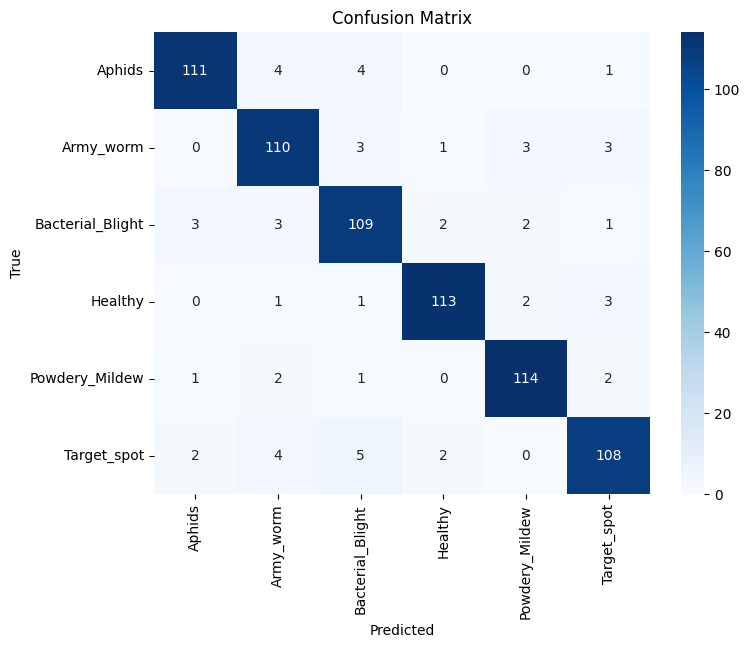

Classification Report:
                  precision    recall  f1-score   support

          Aphids       0.95      0.93      0.94       120
       Army_worm       0.89      0.92      0.90       120
Bacterial_Blight       0.89      0.91      0.90       120
         Healthy       0.96      0.94      0.95       120
  Powdery_Mildew       0.94      0.95      0.95       120
     Target_spot       0.92      0.89      0.90       121

        accuracy                           0.92       721
       macro avg       0.92      0.92      0.92       721
    weighted avg       0.92      0.92      0.92       721

F1 Score: 0.9224525726936526
Recall Score: 0.9223300970873787
Accuracy: 0.9223300970873787


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved model
model_path = 'D:/Model_save'
loaded_model = load_model(model_path)

# Load the validation data
validation_data = valid_datagen.flow_from_directory(validation_data_path,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False)

# Get true labels
true_labels = validation_data.classes

# Make predictions
predictions = loaded_model.predict(validation_data)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_data.class_indices, yticklabels=validation_data.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
class_report = classification_report(true_labels, predicted_labels, target_names=validation_data.class_indices.keys())
print("Classification Report:")
print(class_report)

# F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1}")

# Recall Score
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f"Recall Score: {recall}")

# Accuracy Score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")


Found 721 images belonging to 6 classes.
1/1 [==============================] - 0s 88ms/step


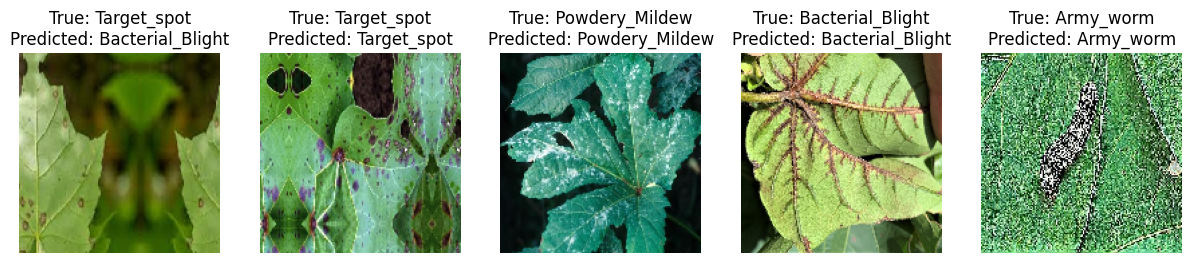

In [39]:
import random
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Function to plot images with true and predicted labels
def plot_images_with_predictions(model, data_generator, class_labels, num_images=5):
    # Get a batch of images and labels from the validation set
    images, true_labels = next(data_generator)

    # Make predictions using the loaded model
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Plot the images with true and predicted labels
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_label_index = np.argmax(true_labels[i])
        predicted_label_index = predicted_labels[i]
        plt.title(f'True: {class_labels[true_label_index]}\nPredicted: {class_labels[predicted_label_index]}')
        plt.axis('off')

    plt.show()

# Load the model
model_path = "D:/Model_save"
loaded_model = load_model(model_path)

# Load the validation data
validation_data = valid_datagen.flow_from_directory(validation_data_path,
                                                    target_size=(150, 150),
                                                    batch_size=5,
                                                    class_mode='categorical',
                                                    shuffle=True)  # Shuffle for randomness

# Get class labels and indices
class_labels = list(validation_data.class_indices.keys())

# Convert labels to categorical format for sklearn metrics
lb = LabelBinarizer()
true_labels_bin = lb.fit_transform(validation_data.classes)

# Plot images with true and predicted labels
plot_images_with_predictions(loaded_model, validation_data, class_labels, num_images=5)
